## Example reading a matlab .mat file and converting datenum to datetime

### In Matlab:
```
>> load Sandwidch_WL_surgeplustide_lag.mat
>> whos
  Name            Size                 Bytes  Class     Attributes

  T               1x113857            910856  double              
  sand_total      1x113857            910856  double              

>> datestr(T(1))
ans =
    '01-Jan-2015'
>> datestr(T(end))
ans =
    '01-Apr-2018'
>> 24*diff(T(1:2))
ans =
    0.2500
```

In [13]:
import numpy as np
import os
import scipy.io
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

wl_fpath = r"D:\crs\proj\2015_Sandwich\data_proc\waves_water_levels"
fpath3 = os.path.join(wl_fpath,'Sandwidch_WL_surgeplustide_lag.mat')

wlevels = scipy.io.loadmat(fpath3)
wl = np.squeeze(np.array(wlevels["sand_total"]))
T = np.squeeze(np.array(wlevels["T"]))

print("Type and shape of T: ",type(T),print(np.shape(T)))

def matlab_datenum_to_datetime( dn ):
    """
    Convert matlab datenum to array of python datetime objects
    
    Input:
        dn - numpy array of matlab datenums   
    Returns:
        numpy array of datetime objects
    
    https://stackoverflow.com/questions/13965740/converting-matlabs-datenum-format-to-python/13965852#13965852
    """
    # loop through and make a list of datetime objects
    dtime = []
    for i in range(len(dn)):
      dtime.append( dt.datetime.fromordinal( int(dn[i])-366 ) + dt.timedelta(days=dn[i]%1) )
    # convert the list to an array

dtime = matlab_datenum_to_datetime( T )

# Good info on datetime formatting:
# https://stackoverflow.com/questions/10624937/convert-datetime-object-to-a-string-of-date-only-in-python
print("First time: ",'{:%m/%d/%Y %H:%M:%S}'.format(dtime[0]))
print("Last time : ",'{:%m/%d/%Y %H:%M:%S}'.format(dtime[-1]))

(113857,)
Type and shape of T:  <class 'numpy.ndarray'> None
First time:  01/01/2015 00:00:00
Last time :  04/01/2018 00:00:00


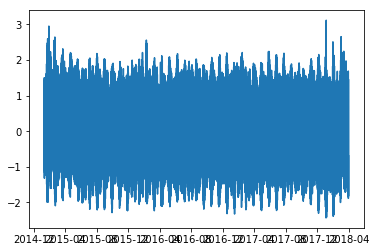

In [6]:
plt.plot(dtime,wl)